In [ ]:
# Download dataset
# from: https://medium.com/@ryan_murray1/watermark-removal-and-detection-part-i-f17dbf93e886
# https://drive.google.com/file/d/1N7P9ujPRk-rGs_p-KIBV43IaIMQoHe6N/view?usp=share_link
!gdown --id 1N7P9ujPRk-rGs_p-KIBV43IaIMQoHe6N
!unzip no_watermark2.zip

# Download watermark font
# https://drive.google.com/file/d/1m-fEYeyZ9eJ8Pho0YNII591zvLtYNXda/view?usp=share_link
!gdown --id 1m-fEYeyZ9eJ8Pho0YNII591zvLtYNXda

/usr/local/lib/python3.9/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1N7P9ujPRk-rGs_p-KIBV43IaIMQoHe6N
To: /content/no_watermark2.zip
100% 14.2M/14.2M [00:00<00:00, 51.1MB/s]
Archive:  no_watermark2.zip
   creating: no_watermark2/
  inflating: no_watermark2/3bj5k7.jpg  
  inflating: __MACOSX/no_watermark2/._3bj5k7.jpg  
  inflating: no_watermark2/4ldm1u_imgur_CCmnvAN.jpg  
  inflating: __MACOSX/no_watermark2/._4ldm1u_imgur_CCmnvAN.jpg  
  inflating: no_watermark2/2kivki.jpg  
  inflating: __MACOSX/no_watermark2/._2kivki.jpg  
  inflating: no_watermark2/3w95bs.jpg  
  inflating: __MACOSX/no_watermark2/._3w95bs.jpg  
  inflating: no_watermark2/3wyo4r.jpg  
  inflating: __MACOSX/no_watermark2/._3wyo4r.jpg  
  inflating: no_watermark2/5gr5un.jpg  
  inflating: __MACOSX/no_watermark2/._5gr5un.jpg

In [ ]:
import os, shutil
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from PIL import ImageFont
from PIL import ImageDraw, ImageOps
import string
import numpy as np
import cv2

In [ ]:
#set the seed
np.random.seed(seed=123)

### Function to generate watermarks on images:

In [ ]:
#list of printable characters that could appear in a watermark
prints = list(string.printable)[0:84]

def gen_watermark(im_str, train = 1):
    
    #open all of the images from the VOC2008 dataset as jpegs
    img = Image.open("/content/no_watermark2/{}".format(im_str))
    
    #save original image as np array to 'RAWS' directory
    img.save('/content/clean/clean_img/{}'.format(im_str))
    
    #generate random font size between 30-100
    font_size = np.random.randint(low = 20, high = 100)
    
    #create the watermark font for the image
    font = ImageFont.truetype("abel-regular.ttf", font_size) 
    
    #generate image to hold the watermark text object
    img_temp = Image.new('L', (350,350))
    
    #create the watermark text, of random length, using random printable characters
    text_str = np.random.choice(prints, np.random.randint(low=5, high = 10))
    text_str = "".join(text_str)
    
    #draw on temporary image with text
    draw_temp = ImageDraw.Draw(img_temp) 
    
    #generate a random integer for the opacity argument (fill)
    opac = np.random.randint(low=90, high=120)
    
    #insert text onto the temporary image
    draw_temp.text((0, 0), text_str,  font=font, fill=opac)
    
    #generate a random integer for rotation:
    rot_int = np.random.randint(low = 0, high = 20)
    
    #rotate the text on the temporary image
    rotated_text = img_temp.rotate(rot_int,  expand=1)
    
    #default color of watermark set to white; change if desired
    col_1 = (255,255,255)
    col_2 = (255,255,255)
    
    #generate a random location for the watermark on the image
    rand_loc = tuple(np.random.randint(low=10,high=100, size = (2,)))
    
    #merge the temporary image with text with the image passed in 
    #third tuple also needs to be random: controls the location of the img
    img.paste(ImageOps.colorize(rotated_text, col_1, col_2), rand_loc,  rotated_text)
    
    #this yeilds a new image with a watermark
    #save this jpeg with a watermark to the WATS directory
    img.save('/content/watermark/watermark_img/{}'.format(im_str))

### Creating the directories to hold the original and watermarked images:

In [ ]:
rpath = "/content/clean"
wpath = "/content/watermark"

if not os.path.exists(rpath):
    os.mkdir(rpath)
    os.mkdir("/content/clean/clean_img")
else:
    shutil.rmtree(rpath)  
    
if not os.path.exists(wpath):
    os.mkdir(wpath)
    os.mkdir("/content/watermark/watermark_img")
else:
    shutil.rmtree(wpath)

### Generate images with and without watermarks:

In [ ]:
!rm /content/no_watermark2/.DS_Store

In [ ]:
#generate 
im_list = os.listdir("/content/no_watermark2/")

#run time is about 5-6 minutes for all 5000 images:
for ind, img in enumerate(im_list):
    
    #add the watermark to the image and save to 'watered' directory
    wat_img = gen_watermark(img)

### Examples below:

In [ ]:
dir_raw = os.listdir("/content/clean/clean_img")
dir_wats = os.listdir("/content/watermark/watermark_img")

#example: 
raw_str = "/content/clean/clean_img/"
wat_str = "/content/watermark/watermark_img/"

f, axs = plt.subplots(3,2, figsize=(25, 25), sharey=True, sharex = True)
axs = axs.ravel()

img_raw = Image.open(raw_str + dir_raw[4])
img_wat = Image.open(wat_str + dir_wats[4])
axs[0].imshow(img_raw)
axs[1].imshow(img_wat)

img_raw = Image.open(raw_str + dir_raw[5])
img_wat = Image.open(wat_str + dir_wats[5])
axs[2].imshow(img_raw)
axs[3].imshow(img_wat)

img_raw = Image.open(raw_str + dir_raw[10])
img_wat = Image.open(wat_str + dir_wats[10])
axs[4].imshow(img_raw)
axs[5].imshow(img_wat)

plt.show()

Output hidden; open in https://colab.research.google.com to view.

# Network Code

#### Import the data from the folders created to hold the original images and their corresponding image with a watermark. Standardize and reshape the images to fit into the network.

In [ ]:
import os, shutil
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from PIL import ImageFont
from PIL import ImageDraw, ImageOps
import string
import numpy as np
import cv2

In [ ]:
raw_dir = '/content/clean/'
wat_dir = '/content/watermark/'

raw_datagen = ImageDataGenerator(rescale=1./255)

raw_generator = raw_datagen.flow_from_directory(
        raw_dir,  # this is the target directory
        target_size=(512, 512),
        batch_size=5096, shuffle = 0,
        class_mode="categorical")

wat_datagen = ImageDataGenerator(rescale=1./255)

wat_generator = wat_datagen.flow_from_directory(
        wat_dir,  # this is the target directory
        target_size=(512, 512),
        batch_size=5096, shuffle = 0,
        class_mode="categorical")

x_raw,y = raw_generator.next()
x_wat,y = wat_generator.next()

Found 300 images belonging to 1 classes.
Found 300 images belonging to 1 classes.


#### Split the data into training and validation sets. 

In [ ]:
x_train_raw = x_raw[0:45]
x_train_wat = x_wat[0:45]

x_val_raw = x_raw[45:49]
x_val_wat = x_wat[45:49]

x_train = np.vstack((x_train_raw, x_train_wat))
x_val = np.vstack((x_val_raw, x_val_wat))

In [ ]:
y_train = np.repeat([0.], 45)
y_train = np.append(y_train, np.repeat([1.], 45))

y_val = np.repeat([0.], 4)
y_val = np.append(y_val, np.repeat([1.], 4))

In [ ]:
print(x_val_raw.shape, x_val_wat.shape)
print(x_train.shape, y_train.shape, x_val.shape, y_val.shape)

(4, 512, 512, 3) (4, 512, 512, 3)
(90, 512, 512, 3) (90,) (8, 512, 512, 3) (8,)


#### Create the response variables for each data set: images with a watermark have a response of 1, while images without a watermark have a response of 0. 

In [ ]:
model = keras.models.Sequential()
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='elu', input_shape=(512, 512, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='elu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='elu'))
model.add(layers.Conv2D(100, (3, 3), activation='elu'))
model.add(layers.MaxPooling2D((4, 4)))

model.add(layers.Conv2D(75, (3, 3), activation='elu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dropout(0.3))
model.add(layers.Dense(202, activation='elu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(40, activation='elu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['acc'])
#model.summary()
history = model.fit(x_train, y_train, validation_data = (x_val, y_val), epochs = 30, 
          batch_size = 40, verbose = 0)

In [ ]:
import pandas as pd

#write the history to a csv for use in plotting

df = pd.DataFrame(history.history)
df.to_csv('history.csv')

In [ ]:
# watermark1
# https://drive.google.com/file/d/1kdxK8ynt1_UNen3UcoFd4OFIhfPDGQaQ/view?usp=share_link
!gdown --id 1kdxK8ynt1_UNen3UcoFd4OFIhfPDGQaQ
!unzip watermark1.zip

/usr/local/lib/python3.9/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1kdxK8ynt1_UNen3UcoFd4OFIhfPDGQaQ
To: /content/watermark1.zip
100% 66.0k/66.0k [00:00<00:00, 51.6MB/s]
Archive:  watermark1.zip
  inflating: __MACOSX/._watermark1   
  inflating: watermark1/.DS_Store    
  inflating: __MACOSX/watermark1/._.DS_Store  
  inflating: watermark1/1.jpg        
  inflating: __MACOSX/watermark1/._1.jpg  


(512, 512, 3)


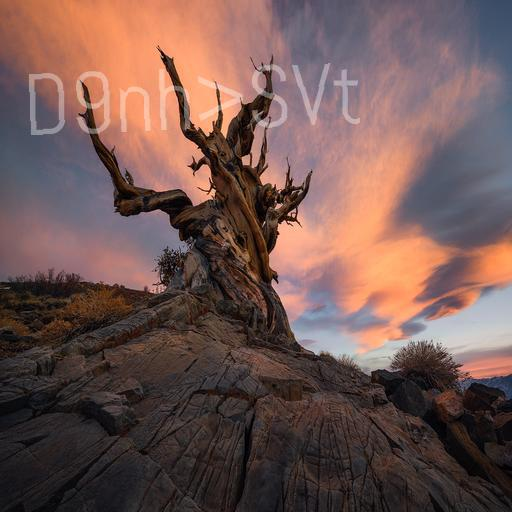

(512, 512, 3)
1/1 [==============================] - 0s 402ms/step


In [65]:
from google.colab.patches import cv2_imshow

# Load the test image
image = cv2.imread('watermark1/10002.jpg')
print(image.shape)
cv2_imshow(image)

# # Preprocess the test image
# image = cv2.resize(image, (512, 512))
# image = np.expand_dims(image, axis=0)
# image = image.astype('float32') / 255.0
# image = Image.fromarray((image * 255).astype(np.uint8))
print(image.shape)


predictions = model.predict(np.array([image]))

[[3.44393e-07]]
464 373 5 3


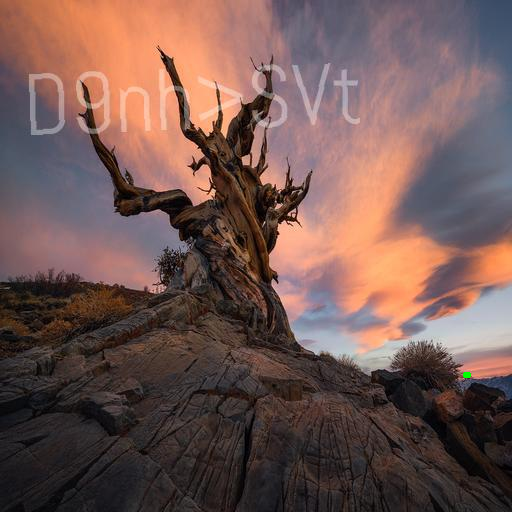

In [66]:
print(predictions)
# if predictions[0][0] > 0.5:
# If the prediction is positive, find the contours of the watermark in the image
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw a bounding box around the watermark
x, y, w, h = cv2.boundingRect(contours[0])
print(x,y,w,h)
cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
cv2_imshow(image)
# else:
#     print('none')